# Kmeans Clustering Exercise

In [2]:
import pandas as pd
df = pd.read_csv('./data/Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
157,158,Female,30,78,78
121,122,Female,38,67,40
15,16,Male,22,20,79
144,145,Male,25,77,12
13,14,Female,24,20,77


In [3]:
# change the column name 
df = df.rename(columns={
                        'Gender': 'gender', 
                        'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'
                        })

# change categorical data to numerik
mapg = {'Female': 0,   
        'Male': 1}
df.gender = df.gender.map(mapg)

# show preprocessed data
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
# drop column id and gender because not relevant to be segmented
X = df.drop(columns=['CustomerID', 'gender'])

# make a list for inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)


Text(0, 0.5, 'Inertia')

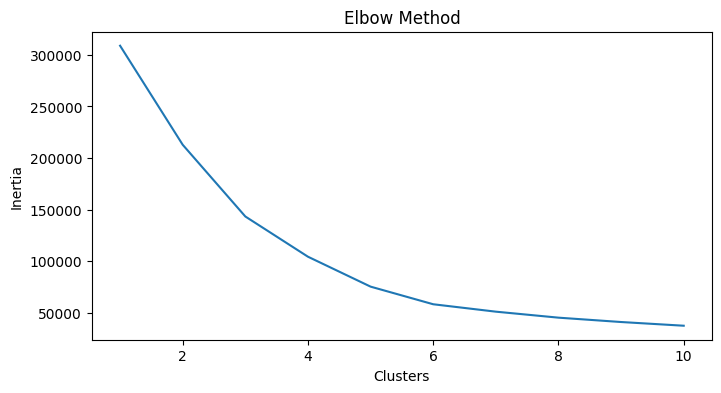

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# create inertia plot
fig,ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Text(0.5, 1.0, 'Mall Customers KMeans 5 Clusters')

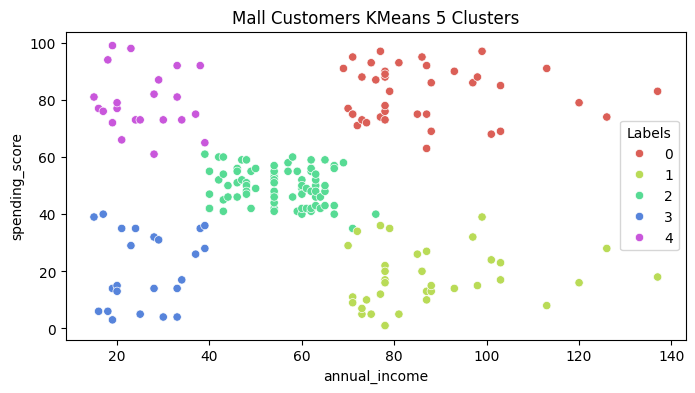

In [9]:
# make KMeans Object
km5 = KMeans(n_clusters=5).fit(X)

# add label column to dataset
X['Labels'] = km5.labels_

# plot KMeans with 5 clusters
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Mall Customers KMeans 5 Clusters')